<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preface" data-toc-modified-id="Preface-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preface</a></span><ul class="toc-item"><li><span><a href="#About-this-project" data-toc-modified-id="About-this-project-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>About this project</a></span></li><li><span><a href="#Why-Jupyter-notebook" data-toc-modified-id="Why-Jupyter-notebook-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Why Jupyter notebook</a></span></li></ul></li><li><span><a href="#Import-and-Explore-Enron-Dataset" data-toc-modified-id="Import-and-Explore-Enron-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import and Explore Enron Dataset</a></span></li><li><span><a href="#Select-Features" data-toc-modified-id="Select-Features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Select Features</a></span></li><li><span><a href="#Remove-Outliers" data-toc-modified-id="Remove-Outliers-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Remove Outliers</a></span></li><li><span><a href="#Create-New-Features" data-toc-modified-id="Create-New-Features-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Create New Features</a></span></li><li><span><a href="#Try-Multiple-Classifiers" data-toc-modified-id="Try-Multiple-Classifiers-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Try Multiple Classifiers</a></span><ul class="toc-item"><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#Nearest-Neighbor" data-toc-modified-id="Nearest-Neighbor-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Nearest Neighbor</a></span><ul class="toc-item"><li><span><a href="#K-Nearest-Neighbor" data-toc-modified-id="K-Nearest-Neighbor-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>K-Nearest Neighbor</a></span></li><li><span><a href="#Radius-Neighbor" data-toc-modified-id="Radius-Neighbor-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Radius-Neighbor</a></span></li><li><span><a href="#Thought-Experiment" data-toc-modified-id="Thought-Experiment-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Thought Experiment</a></span></li></ul></li><li><span><a href="#SVM" data-toc-modified-id="SVM-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Decision Trees</a></span></li><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Random Forests</a></span></li></ul></li><li><span><a href="#Tune-Classifier" data-toc-modified-id="Tune-Classifier-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Tune Classifier</a></span></li></ul></div>

# Preface

## About this project

This is the final project of the Udacity course, "Intro to Machine Learning". The course content exposed me to the end-to-end process of investigating data through a machine learning lense. 

For this final project I will be working with the Enron dataset and building an algorithm to identify Enron employees who may have committed fraud. I will be using the publicly available Enron financial and email dataset. This project will teach me how to extract and identify features that best represent the dataset, how to use some of the most commonly used machine learning algorithms today, and how to evaluate the performance of my machine learning algorithm.

The projects in the class up to this point were curated to have many data points, intuitive results, and behave nicely. This project is significantly different in that the Enron dataset is a real, imperfect dataset. It is messy, it doesn't have as many points as we would prefer, and doesn't always make intuitive sense. The aim of this project is to achieve an F1 score greater than .3

## Why Jupyter notebook

I originally started the project using the starter code provided by the instructors. I was building in a simple text editor however, as the project grew I was doing many revisions through experimenting and as my understanding evolved. This lead to development on multiple fronts in parallel while within a simple text editor, this lead to disorganization and reduced productivity as I had to be cognizant of what experiment I was trying and what commenting/uncommenting was needed throughout the code chain for a particular test. Moving to Jupyter notebooks is the attempted solution.

Jupyter notebooks offers advantages over a simple text editor in two main areas (that I can think of right now). First is the rich-text formatting. I can have commentary, code-snippets, and persistent plots all in-line, within an optional Table of Contents, which should improve organization and reduce mental clutter, hopefully leading to a more focused development path. Second is the individual code-cells. These allow me to run specific blocks of code instead of re-running the entire script with particular areas commented out for a given test. This removes the mental load of remembering which areas to comment out as well as the time spent editing.

# Import and Explore Enron Dataset

Importing various libraries 

In [1]:
import sys
sys.path.append("../tools/")
import pickle
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

Load the dictionary containing the dataset

In [2]:
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

Lets do some preliminary exploration of what the dataset has:

In [3]:
data_dict.keys()

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F',
 'HUMPHREY GENE E',
 'UMANOFF ADAM S',
 'BLACHMAN JEREMY M',
 'SUNDE MARTIN',
 'GIBBS DANA R',
 'LOWRY CHARLES P',
 'COLWELL WESLEY',
 'MULLER MARK S',
 'JACKSON CHARLENE R',
 'WESTFAHL RICHARD K',
 'WALTERS GARETH W',
 'WALLS JR ROBERT H',
 'KITCHEN LOUISE',
 'CHAN RONNIE',
 'BELFER ROBERT',
 'SHANKMAN JEFFREY A',
 'WODRASKA JOHN',
 'BERGSIEKER RICHARD P',
 'URQUHART JOHN A',
 'BIBI PHILIPPE A',
 'RIEKER PAULA H',
 'WHALEY DAVID A',
 'BECK SALLY W',
 'HAUG DAVID L',
 'ECHOLS JOHN B',
 'MENDELSOHN JOHN',
 'HICKERSON GARY J',
 'CLINE KENNETH W',
 'LEWIS RICHARD',
 'HAYES ROBERT E',
 'MCCARTY DANNY J',
 'KOPPER MICHAEL J',
 'LEFF DANIEL P',
 'LAVORATO JOHN J',
 'BERBERIAN DAVID',
 'DETMERING TIMOTHY J',
 'WAKEHAM JOHN',
 'POWERS WILLIAM',
 'GOLD JOSEPH',
 'BANNANTINE JAMES M',
 'DUNCAN JOHN H'

Interesting, there is an entry called 'TOTAL' and 'THE TRAVEL AGENCY IN THE PARK', lets remember those for later. Lets see what is associated with each key:

In [4]:
data_dict.values()[0]

{'bonus': 600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'mark.metts@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 94299,
 'from_messages': 29,
 'from_poi_to_this_person': 38,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 1740,
 'poi': False,
 'restricted_stock': 585062,
 'restricted_stock_deferred': 'NaN',
 'salary': 365788,
 'shared_receipt_with_poi': 702,
 'to_messages': 807,
 'total_payments': 1061827,
 'total_stock_value': 585062}

We see there are a handful of data points we can use as potential features, which is a good segue into the next section.

# Select Features

An initial selection of features to investigate is made. I chose to use all the financial features, ignoring the email information, to start. This was because financial data made more intuitive sense and didn't require much, if any, manipulation to start working with. I selected all the financial features because I didn't want to risk throwing out potentially valuable information by mere choice. I'd prefer to use a more systematic or mathematical approach to removing features rather than my intuition (irony is that I did this with the email information, but we'll include that later).

In [5]:
financial_features = ['salary',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'other',
 'director_fees',
 'deferred_income',
 'long_term_incentive']

# Remove Outliers

I want to detect outliers in a way that minimize human inspection of each element. If possible I'll try to use something that can be applied at scale. My first thought is a simple sigma-level detection. I compute the standard deviation for each feature and report back any values and names above 3-sigma:

In [6]:
def SigmaAlerts(data, feature):
    alerts = []
    # grabbing the values for a given feature into an array (turning values to int() and ignoring NaNs)
    feat_arr = np.array([int(data[key][feature])
                         for key in data if data[key][feature] != 'NaN'])
    # computing the std-dev and if a value lies outside 3-sigma do the next part
    for value in feat_arr:
        if value > 3*np.std(feat_arr)+np.mean(feat_arr):
            # if above 3-sigma, search and return key for inspection
            for key in data_dict:
                if value == data[key][feature]:
                    alerts.append(key)
    return alerts


alerts = SigmaAlerts(data_dict, 'salary')
print alerts

['TOTAL']


The above code can be run for a specific feature and it will return back outliers above 3-sigma. Lets modify this code so we can pass our list of features:

In [7]:
def AllSigmaAlerts(data, feature_list, full_info=False):
    all_alerts = []
    for feature in feature_list:
        alerts = SigmaAlerts(data, feature)
        print '%s alerts: %s' % (feature, alerts)
        all_alerts.append(alerts)

        # for closer inspection
        if full_info is True:
            for name in alerts:
                print '%s triggers 3-sigma alert on %s. Full info: \n %s' % (
                    name, feature, data[name])
                raw_input('Enter to continue')

    # this returns a list of lists, so we'll re-write it to a single list and uniquify names
    flat_alerts = np.unique([name for alert in all_alerts for name in alert])
    return flat_alerts

alerts = AllSigmaAlerts(data_dict, financial_features, full_info=False)
#print alerts

salary alerts: ['TOTAL']
deferral_payments alerts: ['TOTAL']
total_payments alerts: ['LAY KENNETH L', 'TOTAL']
exercised_stock_options alerts: ['TOTAL']
bonus alerts: ['TOTAL']
restricted_stock alerts: ['TOTAL']
restricted_stock_deferred alerts: ['BHATNAGAR SANJAY']
total_stock_value alerts: ['TOTAL']
expenses alerts: ['TOTAL']
loan_advances alerts: []
other alerts: ['TOTAL']
director_fees alerts: ['TOTAL']
deferred_income alerts: []
long_term_incentive alerts: ['TOTAL']


Our 'TOTAL' entry in the dataset dominates all the alerts. Lets take a look at that dictionary entry:

In [8]:
data_dict['TOTAL']

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

The high values seem pretty likely this is just a sum of all the values. During the course we did look at a financial spreadsheet that did have a 'TOTAL' row with values that matching this entry. This isn't a specific individual and isn't part of our investigation for people-of-interest (POI), so lets remove it from the dataset and re-run the outliers code:

In [9]:
data_dict.pop('TOTAL',0)
alerts = AllSigmaAlerts(data_dict, financial_features, full_info=False)
#print 'Unique alerts:', alerts

salary alerts: ['LAY KENNETH L', 'SKILLING JEFFREY K', 'FREVERT MARK A']
deferral_payments alerts: ['FREVERT MARK A']
total_payments alerts: ['LAY KENNETH L']
exercised_stock_options alerts: ['LAY KENNETH L', 'RICE KENNETH D', 'HIRKO JOSEPH']
bonus alerts: ['LAVORATO JOHN J', 'LAY KENNETH L', 'SKILLING JEFFREY K']
restricted_stock alerts: ['LAY KENNETH L', 'WHITE JR THOMAS E', 'PAI LOU L']
restricted_stock_deferred alerts: ['BHATNAGAR SANJAY']
total_stock_value alerts: ['LAY KENNETH L', 'SKILLING JEFFREY K', 'HIRKO JOSEPH', 'PAI LOU L']
expenses alerts: ['URQUHART JOHN A', 'MCCLELLAN GEORGE']
loan_advances alerts: []
other alerts: ['LAY KENNETH L', 'FREVERT MARK A']
director_fees alerts: []
deferred_income alerts: []
long_term_incentive alerts: ['LAY KENNETH L', 'MARTIN AMANDA K']


Now we have some familiar names popping up that match with the CEO, CFO, etc. etc. who we know are people of interest. No entries listed here look obviously wrong or weird. 

I'm curious to see if any of these names do *not* have a POI tag. Lets compare the list of known POIs to the names here (this may be more useful as insight into who should be a POI, but lets check this out while we're here): 

In [10]:
pois = []
for key in data_dict:
    if data_dict[key]['poi'] == True:
        pois.append(key)

alert_poi = []
alert_non_poi = []
for name in alerts:
    if data_dict[name]['poi'] == True:
        alert_poi.append(name)
    else:
        alert_non_poi.append(name)

print 'The POIs who set off alerts: \n', alert_poi
print 'The non-POIs who set off alerts: \n', alert_non_poi

The POIs who set off alerts: 
['HIRKO JOSEPH', 'LAY KENNETH L', 'RICE KENNETH D', 'SKILLING JEFFREY K']
The non-POIs who set off alerts: 
['BHATNAGAR SANJAY', 'FREVERT MARK A', 'LAVORATO JOHN J', 'MARTIN AMANDA K', 'MCCLELLAN GEORGE', 'PAI LOU L', 'URQUHART JOHN A', 'WHITE JR THOMAS E']


Not seeing anything here that would be an outlier, but there are a lot of names that trigger 3-sigma alerts that aren't associated with a POI tag.

When initially looking at the names of the dictionary keys we noticed 'TOTAL' and 'THE TRAVEL AGENCY IN THE PARK'. From the premise that we're only looking for *people* in this dataset let's build a rule to detect anything that may not be a person. I'll make the crude assumption that names are generally 2 or 3 entries long. Lets look for any dictionary keys differing in length of the name:

In [11]:
for key in data_dict:
    pieces = len(key.split())
    if pieces < 2 or pieces > 3:
        print key

WALLS JR ROBERT H
BOWEN JR RAYMOND M
OVERDYKE JR JERE C
PEREIRA PAULO V. FERRAZ
BLAKE JR. NORMAN P
THE TRAVEL AGENCY IN THE PARK
WHITE JR THOMAS E
WINOKUR JR. HERBERT S
DERRICK JR. JAMES V
DONAHUE JR JEFFREY M
GLISAN JR BEN F


As we can see, that basic assumption of 2 or 3 entries was pretty crude, not taking into account other cultural naming schemes or additional titles but it did reveal our park entry. Lets see what it contains:

In [12]:
data_dict['THE TRAVEL AGENCY IN THE PARK']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

The name is vague and only has one value associated with it. I decided to do some searching and found that there was a 'legitimate' travel agency called, "Travel Agency in the Park" and it was located in Houston, Texas where Enron was located. Upon more searching I found this agency was owned by [Sharon Lay](http://content.time.com/time/magazine/article/0,9171,198885,00.html), who is Ken Lay's sister and this was the chosen agency to handle Enron travel, scooping up ~7 million dollars worth of business. The payment listed here of ~$350,000 was [reportedly](https://www.travelweekly.com/Travel-News/Travel-Agent-Issues/Texas-agency-takes-a-huge-hit-from-Enron-s-fall) sent to the agency less than 3 weeks from the bankruptcy. The travel agency has since gone out of business but ironically, the address at where it used to exist is now home to an [Oil and Gas Software Solutions company](https://www.p2energysolutions.com/).

Back to the matter at hand, given that it's not an individual, I'll remove it from the dataset.

In [13]:
data_dict.pop('THE TRAVEL AGENCY IN THE PARK', 0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

Up to this point we've removed the non-human entries we found in the dataset (though the TOTAL key was found by looking at the 3-sigma outliers). Lets finally take a peak at the values in the data and plot a pair of features for a sanity check:

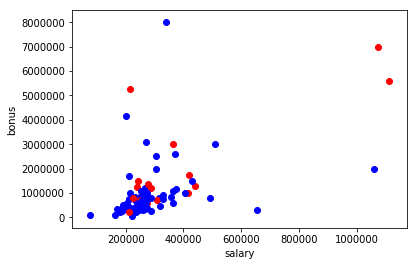

In [14]:
def ScatterPlot(feat1, feat2):
    # adding POI is needed to color points
    features = ['poi'] + [feat1] + [feat2]
    data = featureFormat(data_dict, features, sort_keys=True)
    for point in data:
        poi = point[0]
        feat1 = point[1]
        feat2 = point[2]
        if feat1 != 0.0 and feat2 != 0.0:
            if poi == True:
                plt.scatter(feat1, feat2, color='red')
            if poi == False:
                plt.scatter(feat1, feat2, color='blue')

    plt.xlabel('%s' % features[1])
    plt.ylabel('%s' % features[2])
    plt.rcParams['figure.figsize'] = [6, 6]
    plt.show()

ScatterPlot('salary', 'bonus')

This plot doesn't show any obvious trend related to salary or bonus and being a POI (unfortunately) but something that does stick out is the data near 0. Someone has a pretty low salary and almost no bonus so we'll look into that. Let's print out the lowest three values for the feature ..and while we're at it, lets print the top three as well:

In [15]:
feature = 'salary'
salaries = []
keys = []
for key in data_dict:
    salary = data_dict[key][feature]
    if salary != 'NaN':
        salaries.append(salary)
        keys.append(key)
pairs = zip(salaries, keys)
pairs.sort()
print "Feature:", feature
print "Min 3:", pairs[0:3]
print "Max 3:", pairs[-3:]

Feature: salary
Min 3: [(477, 'BANNANTINE JAMES M'), (6615, 'GRAY RODNEY'), (63744, 'WESTFAHL RICHARD K')]
Max 3: [(1060932, 'FREVERT MARK A'), (1072321, 'LAY KENNETH L'), (1111258, 'SKILLING JEFFREY K')]


Look at that, not only one but two salary entries that don't make much sense, "477" and "6615". Those don't sound like legitimate salaries to me but more like a data entry error. I don't want those contaminating the dataset so lets set them to NaNs:

In [16]:
data_dict['BANNANTINE JAMES M']['salary'] = 'NaN'
data_dict['GRAY RODNEY']['salary'] = 'NaN'

Seeing the minimum and maximum salary values was a useful check. That should be done for each feature in our list:

In [17]:
for feature in financial_features:
    values = []
    keys = []
    for key in data_dict:
        value = data_dict[key][feature]
        if value != 'NaN':
            values.append(value)
            keys.append(key)
    pairs = zip(values,keys)
    pairs.sort()
    print "Feature:", feature
    print "Min 3:", pairs[0:3]
    print "Max 3:", pairs[-3:]
    print "---------------------------------------------------------------------------------"

Feature: salary
Min 3: [(63744, 'WESTFAHL RICHARD K'), (76399, 'REYNOLDS LAWRENCE'), (80818, 'BAZELIDES PHILIP J')]
Max 3: [(1060932, 'FREVERT MARK A'), (1072321, 'LAY KENNETH L'), (1111258, 'SKILLING JEFFREY K')]
---------------------------------------------------------------------------------
Feature: deferral_payments
Min 3: [(-102500, 'BELFER ROBERT'), (7961, 'HAYES ROBERT E'), (10259, 'HIRKO JOSEPH')]
Max 3: [(2964506, 'HUMPHREY GENE E'), (3131860, 'HORTON STANLEY C'), (6426990, 'FREVERT MARK A')]
---------------------------------------------------------------------------------
Feature: total_payments
Min 3: [(148, 'MENDELSOHN JOHN'), (475, 'HAUG DAVID L'), (1279, 'BLAKE JR. NORMAN P')]
Max 3: [(15456290, 'BHATNAGAR SANJAY'), (17252530, 'FREVERT MARK A'), (103559793, 'LAY KENNETH L')]
---------------------------------------------------------------------------------
Feature: exercised_stock_options
Min 3: [(3285, 'BELFER ROBERT'), (9803, 'GILLIS JOHN'), (17378, 'DEFFNER JOSEPH M')]

Some of these look questionable, like total_payments (too small?), and restricted_stock (sign-flip) and restricted_stock_deferred (sign-flip). Since there are only a small number that pop out as questionable we can look into them by-hand. Let's look at the low entries in total_payments:

In [18]:
data_dict['MENDELSOHN JOHN']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': -103750,
 'director_fees': 103750,
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 148,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 148,
 'total_stock_value': 'NaN'}

It looks as thought the 'total_payments' value is the sum of other financial features. This is problematic as all the financial data available isn't available for each person. I'd say this is grounds to remove the feature as it isn't a reliable measure of what it's trying to report.

In [19]:
financial_features.remove('total_payments')

Looking at the feature list there is another item called "total_stock_value", this could have the same problem as total_payments. If total_payments was the sum of all financial data, we could guess that total_stock_value is the sum of all the stock-related features. A way to check this intuition is to find someone with all their financial data and compare the sum of features with 'stock' in the name to the value reported in total_stock_value.

In [20]:
stock_options = [feature for feature in financial_features if 'stock' in feature]
print stock_options

['exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value']


In [21]:
data_dict['BHATNAGAR SANJAY']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 137864,
 'email_address': 'sanjay.bhatnagar@enron.com',
 'exercised_stock_options': 2604490,
 'expenses': 'NaN',
 'from_messages': 29,
 'from_poi_to_this_person': 0,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 137864,
 'poi': False,
 'restricted_stock': -2604490,
 'restricted_stock_deferred': 15456290,
 'salary': 'NaN',
 'shared_receipt_with_poi': 463,
 'to_messages': 523,
 'total_payments': 15456290,
 'total_stock_value': 'NaN'}

Bizarre, this entry has all values for the features going into the total_stock_value but there's an entry of 'NaN'. Is total_stock_value its own unique value? Or composed of something different than my guess?

Even more bizarre, his 'total_payments' is equal to his 'restricted_stock_deferred' but none of the other financial data he has (director_fees, exercised_stock_options, other, restricted_stock) goes into 'total_payments'. That means my intuition of 'total_payments' was wrong and it is only comprised of certain financial data. It's not clear and would require a little more digging to prove what it's composed of but for now we don't need to bother, it's already excluded from our feature list. 

Back to the matter at hand, lets spot-check someone else with stock information...

In [22]:
data_dict['SKILLING JEFFREY K']

{'bonus': 5600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'jeff.skilling@enron.com',
 'exercised_stock_options': 19250000,
 'expenses': 29336,
 'from_messages': 108,
 'from_poi_to_this_person': 88,
 'from_this_person_to_poi': 30,
 'loan_advances': 'NaN',
 'long_term_incentive': 1920000,
 'other': 22122,
 'poi': True,
 'restricted_stock': 6843672,
 'restricted_stock_deferred': 'NaN',
 'salary': 1111258,
 'shared_receipt_with_poi': 2042,
 'to_messages': 3627,
 'total_payments': 8682716,
 'total_stock_value': 26093672}

Doing some basic arithmetic here shows that only the 'exercised_stock_options' and 'restricted_stock' values go into the 'total_stock_value', it does **not** include 'restricted_stock_deferred'. This may explain why Sanjay Bhatnagar's 'total_stock_value' was 'NaN', or equal to 0 (is that the same thing?), because those two values canceled out.

Now that we know only those two features are going into the 'total_stock_value', we can check how complete that financial data is across the dataset:

In [23]:
exercised = []
restricted = []
totals = []
for key in data_dict:
        exer = data_dict[key]['exercised_stock_options']
        if exer != 'NaN':
            exercised.append(exer)
        rest = data_dict[key]['restricted_stock']
        if rest != 'NaN':
            restricted.append(rest)
        total = data_dict[key]['total_stock_value']
        if total != 'NaN':
            totals.append(total)
            
#print 'Exercised stock options data completion: ', float(len(exercised)) / len(data_dict.keys())
#print 'Restricted stock options data completion: ', float(len(restricted))/len(data_dict.keys())

# Or more intuitively, check the fraction of how many entries have both features needed:
both = []
for key in data_dict: 
    exer = data_dict[key]['exercised_stock_options']
    rest = data_dict[key]['restricted_stock']
    if exer != 'NaN' and rest != 'NaN':
        # I only need the length of the list, not the actual contents so using 'exer' or 'rest'
        both.append(exer)
        
print 'Fraction of non-NaN entries having both stock values reported: ', float(len(both))/len(data_dict.keys())
print 'Fraction of non-NaN entries in total_stock_value reported: ', float(len(totals))/len(data_dict.keys())


Fraction of non-NaN entries having both stock values reported:  0.569444444444
Fraction of non-NaN entries in total_stock_value reported:  0.868055555556


This shows that ~30% of the 'total_stock_value' values are being reported with only part of the stock value information. Since 'total_stock_options' can't report reliable numbers here we'll exclude it from the features list:

In [24]:
financial_features.remove('total_stock_value')

Following this line of reasoning, I'm prompted to check how complete the data is across each feature. This seems obvious for any feature that is a composite of other features but why would it be needed for features that aren't? Having a low number of data points in a given feature may just be adding noise since it doesn't capture the underlying distribution. Lets see what our features have:

In [25]:
for feature in financial_features:
    values = []
    for key in data_dict:
        value = data_dict[key][feature]
        if value != 'NaN':
            values.append(value)
    print 'Number of %s values: %i, with overall fraction: %.3f' % (
        feature, len(values), float(len(values))/len(data_dict.keys()))

Number of salary values: 92, with overall fraction: 0.639
Number of deferral_payments values: 38, with overall fraction: 0.264
Number of exercised_stock_options values: 101, with overall fraction: 0.701
Number of bonus values: 81, with overall fraction: 0.562
Number of restricted_stock values: 109, with overall fraction: 0.757
Number of restricted_stock_deferred values: 17, with overall fraction: 0.118
Number of expenses values: 94, with overall fraction: 0.653
Number of loan_advances values: 3, with overall fraction: 0.021
Number of other values: 91, with overall fraction: 0.632
Number of director_fees values: 16, with overall fraction: 0.111
Number of deferred_income values: 48, with overall fraction: 0.333
Number of long_term_incentive values: 65, with overall fraction: 0.451


We'll remove features with completion fractions less than 15%. This number solely came out from seeing a cluster of low-completion fractions of 2%, 11%, and 12%.

In [26]:
financial_features.remove('loan_advances')
financial_features.remove('director_fees')
financial_features.remove('restricted_stock_deferred')
financial_features

['salary',
 'deferral_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'expenses',
 'other',
 'deferred_income',
 'long_term_incentive']

This prompted another question, do I have any features with all of one type of label? That may skew the algorithm to say "if this feature is present, then it must be X". Lets check for that:

In [27]:
for feature in financial_features:
    pois = []
    non_pois = []
    for key in data_dict:
        value = data_dict[key][feature]
        if value != 'NaN':
            flag = data_dict[key]['poi']
            if flag == True:
                pois.append(key)
            else:
                non_pois.append(key)
    print 'For %s, pois: %i non_pois: %i' % (
            feature, len(pois), len(non_pois))


For salary, pois: 17 non_pois: 75
For deferral_payments, pois: 5 non_pois: 33
For exercised_stock_options, pois: 12 non_pois: 89
For bonus, pois: 16 non_pois: 65
For restricted_stock, pois: 17 non_pois: 92
For expenses, pois: 18 non_pois: 76
For other, pois: 18 non_pois: 73
For deferred_income, pois: 11 non_pois: 37
For long_term_incentive, pois: 12 non_pois: 53


Okay good, it seems that no features left are composed of data with only a single label. For fun, I reloaded all of the features into financial_features to see if any features in the dataset had this and it turns out that 'directors_fees' and 'restricted_stock_deferred' have this characteristic. We removed them the step before for low numbers, but it's good to have another reason to remove these.

Up to this point we have removed entries that were not human (ie. 'TOTAL'), we have changed erroneous values (ie. low salaries), and now we have removed entire categories of features based on incomplete data or features containing only one label type. 

Visualizing a dataset is an important component as humans can identify trends and patterns that indicate a relationship (along with identifying outliers). With our cleaned dataset, lets visualize the information we have left. Scatter plots seem the most logical and with pandas and Seaborn we can make a scatter-matrix plot which shows each feature against another. The diagonal of the scatter-matrix is the feature plotted against itself, which is a normally just a line, but here the diagonal plots will be the distribution of values for that feature. The color indicates which points are POIs and those which aren't, this information is also used in the distribution plots.

Something to note: the NaNs from the array get interpreted as 0.0 in the dataframe and get plotted erroneously. You can replace 0.0 with np.nan and use dropna() but this will remove the entire row if a NaN is detected, not the specific index, which removes too much data. 

In general, this approach isn't very practical for high dimension datasets.


In [28]:
# Using pandas for the dataframe and seaborn for the plotting (simpler than matplotlib)
import pandas as pd
import seaborn as sns

# Extract the data from the dictionary, then load into a dataframe
features = ['poi'] + financial_features
findata = featureFormat(data_dict, features, sort_keys=True)
df = pd.DataFrame(findata, columns=features)
df.head()

,poi,salary,deferral_payments,exercised_stock_options,bonus,restricted_stock,expenses,other,deferred_income,long_term_incentive
0,0.0,201955.0,2869717.0,1729541.0,4175000.0,126027.0,13868.0,152.0,-3081055.0,304805.0
1,0.0,0.0,178980.0,257817.0,0.0,0.0,3486.0,0.0,0.0,0.0
2,0.0,0.0,0.0,4046157.0,0.0,1757552.0,56301.0,864523.0,-5104.0,0.0
3,0.0,267102.0,1295738.0,6680544.0,1200000.0,3942714.0,11200.0,2660303.0,-1386055.0,1586055.0
4,0.0,239671.0,260455.0,0.0,400000.0,145796.0,129142.0,69.0,-201641.0,0.0


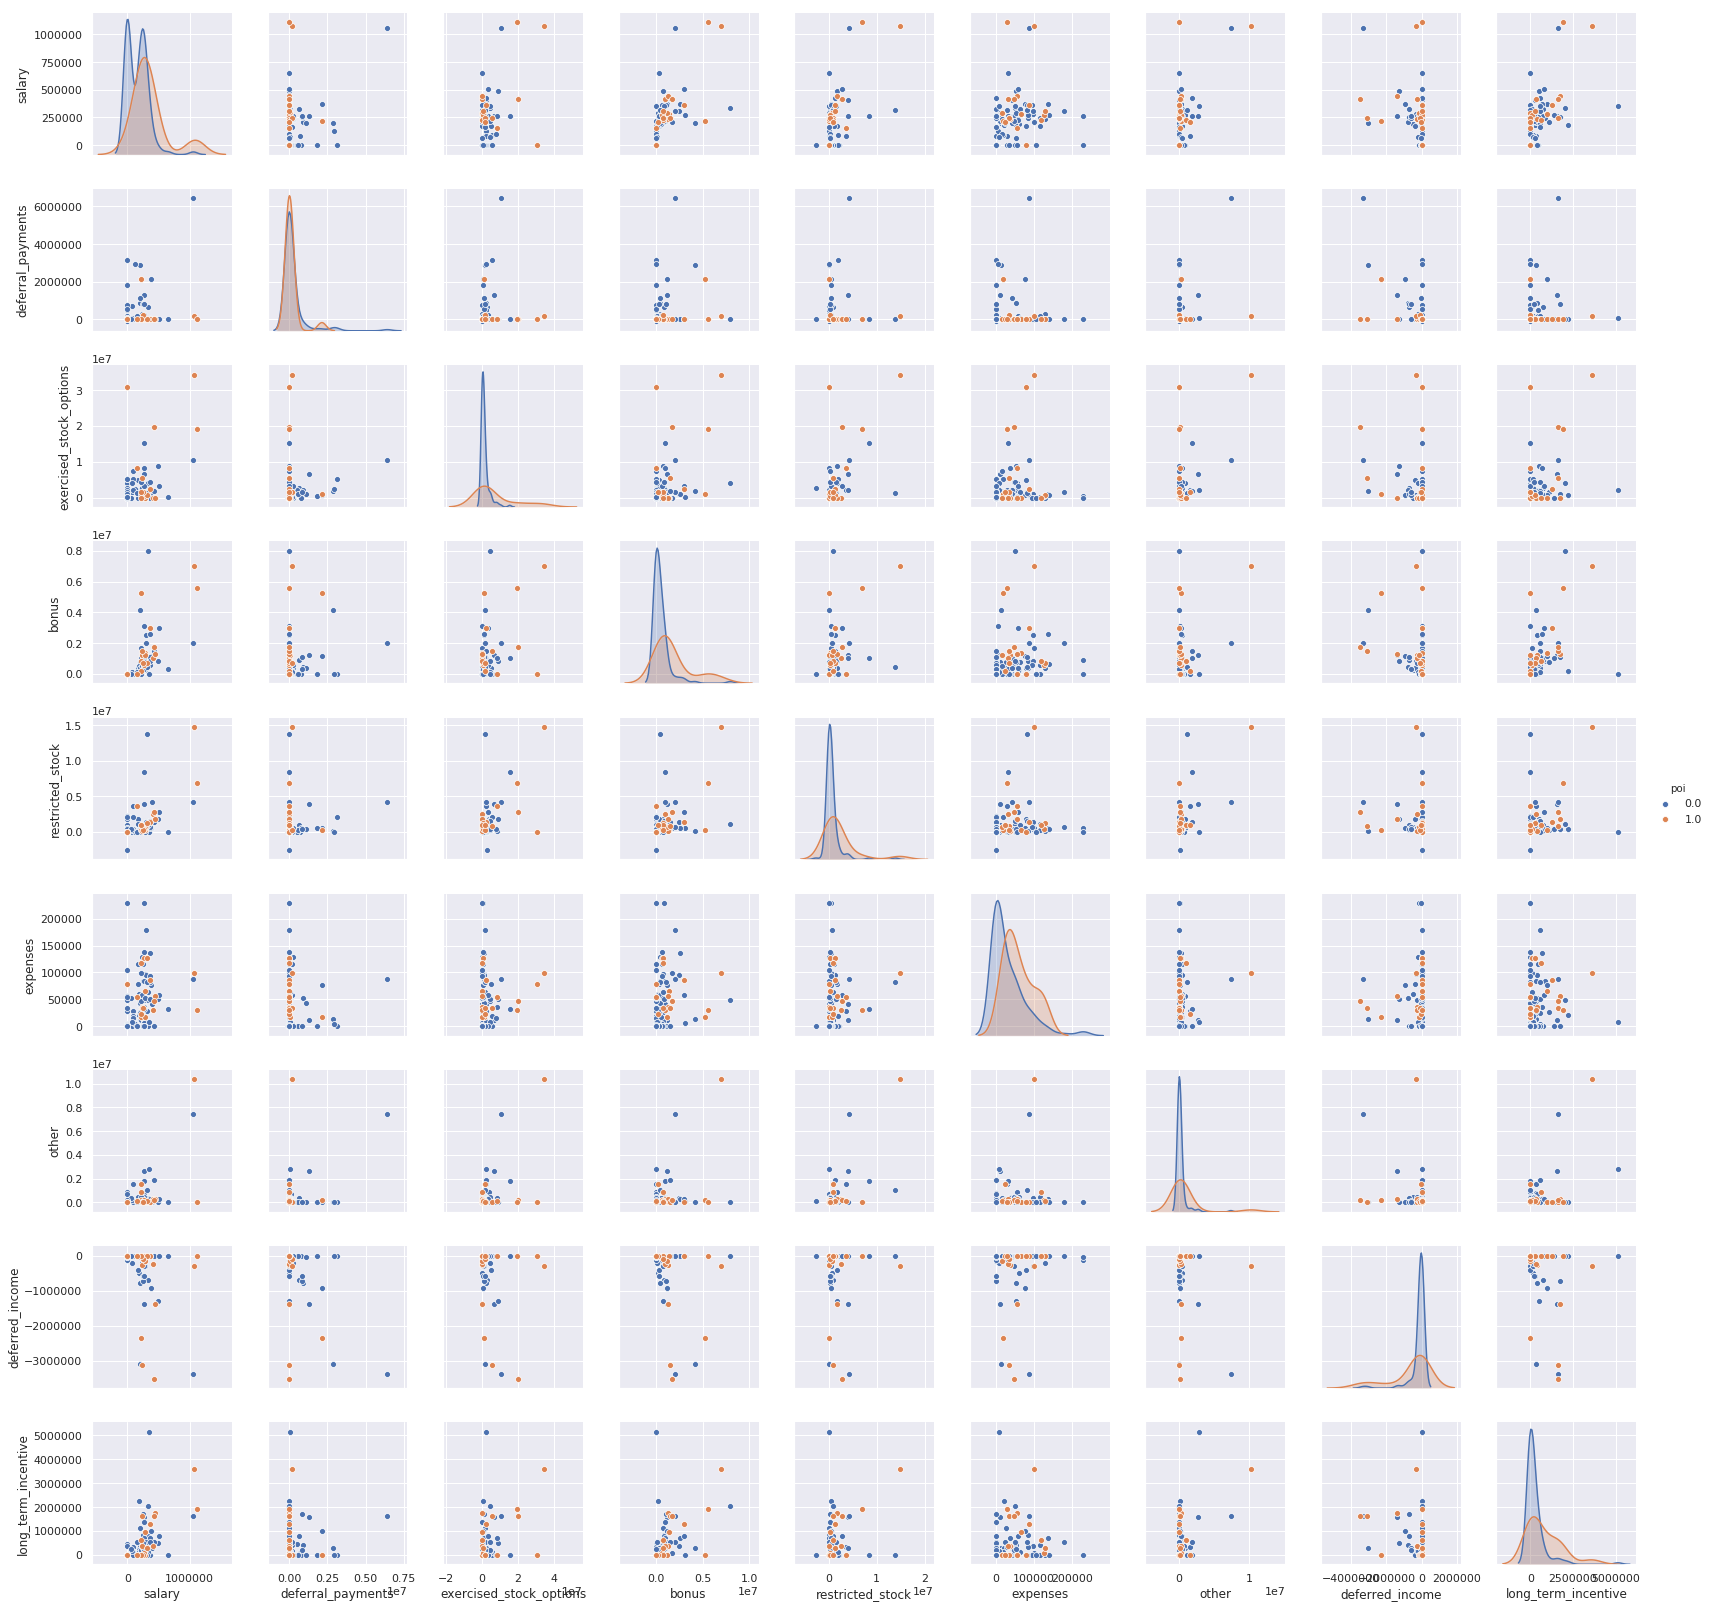

In [29]:
# Set the style and plot
sns.set(style="darkgrid")
# The hue is set to the poi label and the plotted variables is what is passed to vars
sns.pairplot(df, hue='poi', vars=financial_features)

This is a lot to digest. Let's break it down and tease out what we're looking at. 

Remember, features without any data get plotted as 0. Initially, I would prefer to skip plotting any point with a 0 but this does give us some information. It shows the amount of data missing in the dataset.

Next thing that sticks out to me is that there doesn't seem to be any features highly correlated with another feature. This is good as we don't have redundant features then. 

I also don't see any obvious trends or groupings associated with POI status. For the distribution plots (the diagonal), it shows the POIs mostly overlap with the distribution of non-POIs; I interpret this as another way of showing there isn't a distinct set of values attributed to only POIs. The dominant peak is because of the 0-value data points.

There is a single point in 'restricted_stock' that has a negative value where all others are positive. Lets look into that scatter-plot in more detail:

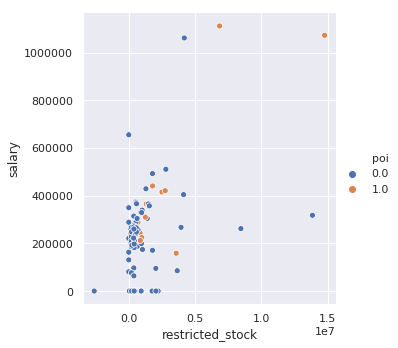

In [30]:
def SeabornScatter(feat1, feat2):
    features = ['poi'] + [feat1] + [feat2]
    data = featureFormat(data_dict, features, sort_keys=True)
    df = pd.DataFrame(data, columns=features)
    sns.relplot(x=feat1, y=feat2, hue='poi', data=df)

SeabornScatter('restricted_stock', 'salary')

Or if you prefer to visualize it without plotting the 0's you can use the ScatterPlot function. However, if the other axis chosen in the scatter plot has a 0 value then your point in question will not show.

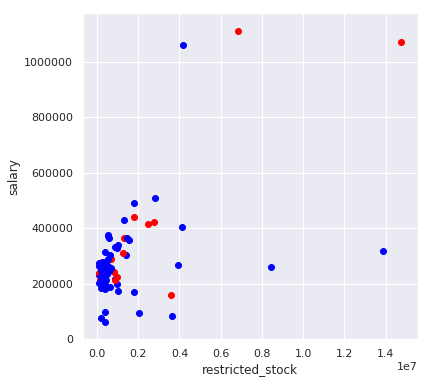

In [31]:
ScatterPlot('restricted_stock', 'salary')

From looking before, the negative value in this feature is associated with Sanjay Bhatnagar, let's look at his entry:

In [32]:
data_dict['BHATNAGAR SANJAY']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 137864,
 'email_address': 'sanjay.bhatnagar@enron.com',
 'exercised_stock_options': 2604490,
 'expenses': 'NaN',
 'from_messages': 29,
 'from_poi_to_this_person': 0,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 137864,
 'poi': False,
 'restricted_stock': -2604490,
 'restricted_stock_deferred': 15456290,
 'salary': 'NaN',
 'shared_receipt_with_poi': 463,
 'to_messages': 523,
 'total_payments': 15456290,
 'total_stock_value': 'NaN'}

I'm not too sure what to make of this, a negative value for restricted_stock? Typically, restricted stock is shares of a company given to an employee but they aren't transferred until certain conditions are met. To have a negative balance on restricted stock ...means to owe the company shares? To have taken shares before they were his property? On top of that, his exercised_stock_options value is the same amount. He claimed shares that weren't yet his to claim?

I did some searching on the topic and found that it may be an issue with how the data was parsed and packaged. It may not be a legitimate number (for that category). From the course, I have a large PDF file with all the financial data that goes into the prepackaged dataset --I'll look there for any clues.

Wow! All kinds of goodies looking at this. Turns out Sanjay's restricted_stock value isn't negative. Not only that but his exercised_stock_options, total_payments, and expenses values are all incorrect. It looks as the parsing skipped a column and shifted all the values over. I think I found the culprit too, there is an empty cell in his row (a null value is reported with a specific symbol, see next).

Glad we looked into that! This clears up some of the confusion we saw earlier when we looked up his name. I can remove his entire entry from the dataset or I could fix it and still use the data, lets do that:

In [33]:
data_dict['BHATNAGAR SANJAY']['director_fees'] = 'NaN'
data_dict['BHATNAGAR SANJAY']['other'] = 'NaN'
data_dict['BHATNAGAR SANJAY']['expenses'] = 137864
data_dict['BHATNAGAR SANJAY']['total_payments'] = 137864 #this category isn't used
data_dict['BHATNAGAR SANJAY']['exercised_stock_options'] = 15456290
data_dict['BHATNAGAR SANJAY']['total_stock_value'] = 15456290
data_dict['BHATNAGAR SANJAY']['restricted_stock'] = 2604490
data_dict['BHATNAGAR SANJAY']['restricted_stock_deferred'] = -2604490
data_dict['BHATNAGAR SANJAY']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'sanjay.bhatnagar@enron.com',
 'exercised_stock_options': 15456290,
 'expenses': 137864,
 'from_messages': 29,
 'from_poi_to_this_person': 0,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 2604490,
 'restricted_stock_deferred': -2604490,
 'salary': 'NaN',
 'shared_receipt_with_poi': 463,
 'to_messages': 523,
 'total_payments': 137864,
 'total_stock_value': 15456290}

If the error only shifted numbers over, how did a value get negative? The PDF denotes empty cells with a negative '-' symbol. My guess is during parsing one of the columns was concatenated with the '-' symbol, turning it negative. 

The spreadsheet *does* indicate deferred (or latent) payments with parenthesis. These parenthesis are interpreted as negative values when parsed into the dataset. This is meant to indicate an asset of the employee but one that has not yet been taken. These assets do not count towards their total values, either total payments or total stock value. That may also clear up some earlier confusion when determining what went into the total features (compounded by looking at Sanjay's erroneous data!)

There are only two features in the dataset with parenthesis and they are deferred_income and restricted_stock_deferred. Lets check to make sure no other values show up as negative and also check that all the values with parenthesis are negative:

In [34]:
for feature in financial_features:
        for key in data_dict:
            value = data_dict[key][feature]
            if feature != 'deferred_income' and feature != 'restricted_stock_deferred':
                if value < 0:
                    print key, feature, value
            else:
                if value > 0 and value != 'NaN':
                    print key, feature, value


BELFER ROBERT deferral_payments -102500


Ah-ha! Another incorrectly parsed row. Let's fix Robert's data with values from the original spreadsheet:

In [35]:
data_dict['BELFER ROBERT']['deferral_payments'] = 'NaN'
data_dict['BELFER ROBERT']['deferred_income'] = -102500
data_dict['BELFER ROBERT']['director_fees'] = 102500
data_dict['BELFER ROBERT']['expenses'] = 3285
data_dict['BELFER ROBERT']['total_payments'] = 3285
data_dict['BELFER ROBERT']['restricted_stock'] = 44093
data_dict['BELFER ROBERT']['restricted_stock_deferred'] = -44093
data_dict['BELFER ROBERT']['total_stock_value'] = 'NaN'
data_dict['BELFER ROBERT']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': -102500,
 'director_fees': 102500,
 'email_address': 'NaN',
 'exercised_stock_options': 3285,
 'expenses': 3285,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 44093,
 'restricted_stock_deferred': -44093,
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 3285,
 'total_stock_value': 'NaN'}

We can run the scatter-matrix plotting again with our updated data to see if anything else needs attention.

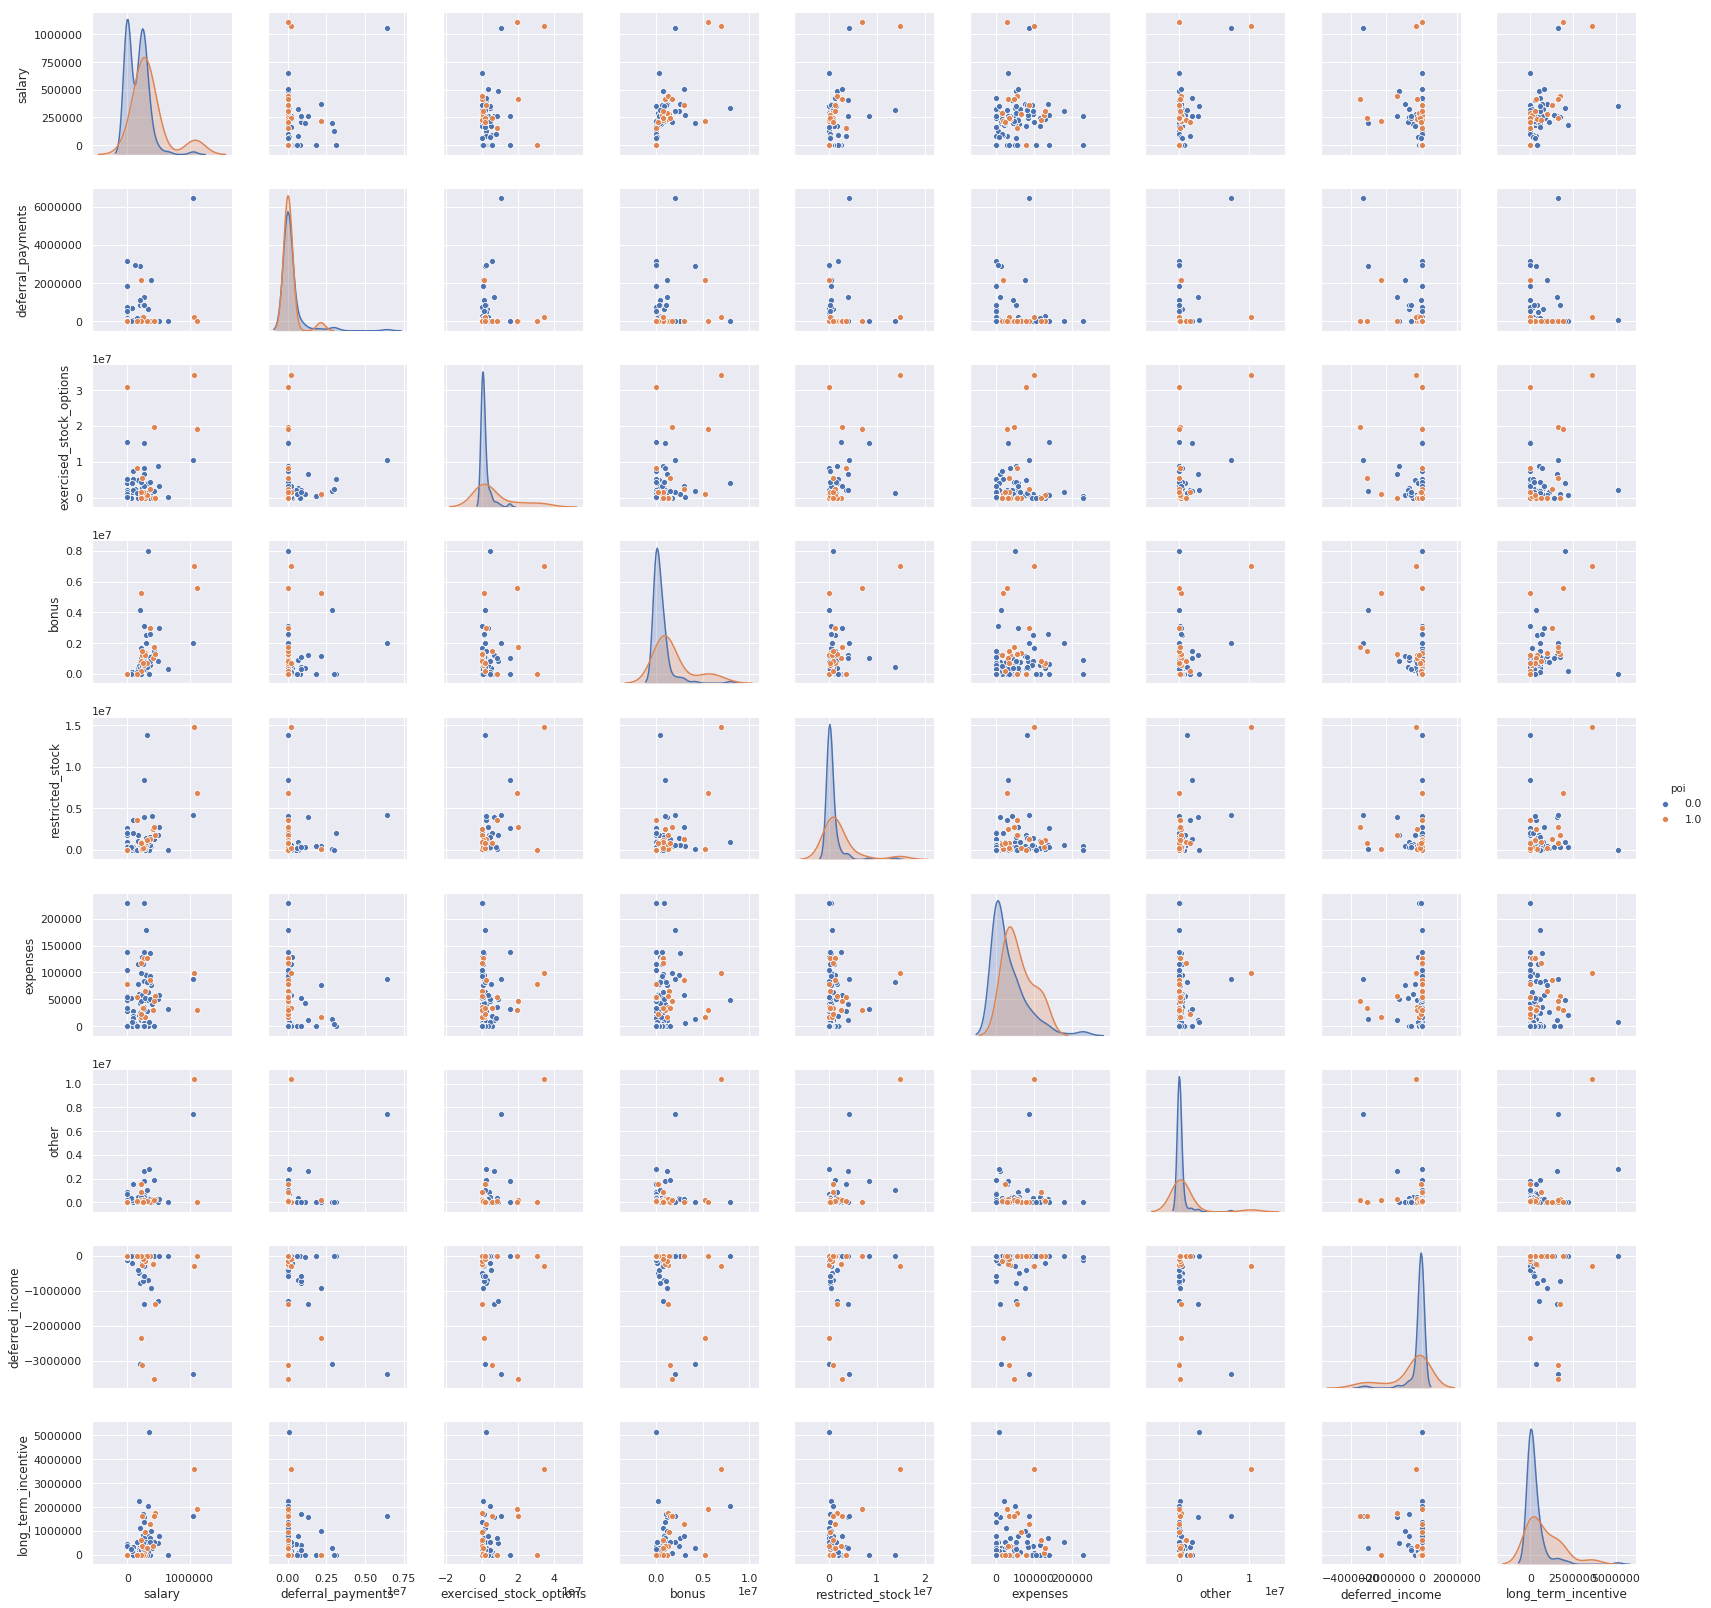

In [36]:
# Extract the data from the dictionary, then load into a dataframe
features = ['poi'] + financial_features
findata = featureFormat(data_dict, features, sort_keys=True)
df = pd.DataFrame(findata, columns=features)
sns.set(style="darkgrid")
sns.pairplot(df, hue='poi', vars=financial_features)

That about wraps it up. I don't see anything else that makes me suspicious. Let's check the overall numbers one last time to see if anything else sticks out. This time, instead of using my SigmaAlert and min/max code, I'll use the pandas describe function:

In [37]:
df.describe().round(2)

,poi,salary,deferral_payments,exercised_stock_options,bonus,restricted_stock,expenses,other,deferred_income,long_term_incentive
count,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00
mean,0.13,188008.01,225939.41,2195544.26,685518.44,917762.67,36867.59,297926.01,-197133.04,341703.72
std,0.33,197231.45,758698.25,4951299.95,1239220.94,2011567.34,46109.74,1138969.26,609678.22,690858.05
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-3504386.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,54437.50,0.00,0.00,-40524.00,0.00
50%,0.00,211240.00,0.00,622498.00,300000.00,364374.00,22614.00,919.00,0.00,0.00
75%,0.00,270850.50,9684.50,1714220.75,800000.00,865181.00,54809.50,149831.00,0.00,375064.75
max,1.00,1111258.00,6426990.00,34348384.00,8000000.00,14761694.00,228763.00,10359729.00,0.00,5145434.00


A few final thoughts on this section:

1.) Now coming to the end and reviewing everything that was done, I noticed my journey to this point wasn't all that organized. I would start with one issue and serendipitously come across another which would take me in a new direction. If doing this again I would organize the cleaning process into a hierarchy by inspecting the parts that have the largest down-stream effect and then work down to the finer details (ie inspect whole features, then check entries in the dictionary, then individual values for a given person). I imagine this approach would be more efficient. For example, I wouldn't want to spend time correcting values in the 'total' entry just to throw it out later for not being a human.


2.) The first scatter plot exposed some questionable values which prompted me to look at the 3 min/max values for each feature. From those numbers I hand-selected what I thought was suspicious. It seems subjective. When I dig into where that 'suspicion' came from, it  was because I noticed a change in a pattern -either a sign-flip or a number being too small compared to others or different to what my pre-conceived notion of what it should be (for example, I excluded the two small salaries even though that's what was written into the PDF). 

I never went back and made a more mathematically based approach to that. How could I do that? Use a metric to judge if there's too much variance in a feature or decide if a range is "too big"? For PCA though they use variance to their advantage? How can it give useful information in one context (PCA) but be indicative of errors in another?


3.) Going to the original financial spreadsheet earlier would have solved some confusion when figuring out what the total_payments and total_stock_value features were comprised of. I made initial guesses of what they were and then compared my guess to faulty data, which lead me to make faulty conclusions. These were checked and corrected later on after reading the PDF (making all deferred payments negative, making all non-deferred positive, and throwing out total_stock_value regardless even though I initially only checked completion of 2 values instead of the 3).


4.) Is there a better metric to remove features based on the number of sampling points? In this process I removed the smallest cluster of points that had a completion fraction less than 15%. I could be more stringent and make it 50%? How to determine that value?


5.) Are there other intuitive/powerful ways to grasp the characteristics of data without illustrating them? For example, if your data has too many dimensions for scatter-matrix plots?

Comment related to that question: a way to reduce the number of features to analyze can be done by selecting those which give the most information, determined through variance-analysis or through Principle Component Analysis (PCA). This allows you to remove features that don't add much information or replace many features with fewer synthetic ones.


6.) For this data, I don't know what drives the decisions for the numbers that are given to people. For example, how is it determined that Ken Lay makes X or so-and-so makes Y? Is anyone unjustifiably making large sums? These types of questions could be relevant to an investigation like this but we are limited with our approach to statistical and categorical tests.

So far I have only considered the financial information data. In the next section I will leverage the email data to assist in the search for POIs. I may even have an idea for trying to detect anyone making unjustifiably large sums by creating new features :)


# Create New Features

Note: unlike the financial data, there isn't a master record to compare the numbers of the reported emails, so I'll have to take whatever is provided in the dataset. Based on the available information and inferring how the financial data looked, I speculate there is errors in the reported numbers.

What I want to get out of this data is a sense of how connected someone was with a POI. The underlying intuition is that if you're in frequent contact or close to a POI, you may be one yourself. 

First I'll load all the features related to email and display some basic metrics.

In [38]:
email_features = ['to_messages',
                  'shared_receipt_with_poi',
                  'from_messages',
                  'from_this_person_to_poi',
                  'from_poi_to_this_person']

In [39]:
for feature in email_features:
    values = []
    keys = []
    for key in data_dict:
        value = data_dict[key][feature]
        if value != 'NaN':
            values.append(value)
            keys.append(key)
    pairs = zip(values,keys)
    pairs.sort()
    print "Feature:", feature
    print "Min 3:", pairs[0:3]
    print "Max 3:", pairs[-3:]
    print "---------------------------------------------------------------------------------"

Feature: to_messages
Min 3: [(57, 'FOY JOE'), (58, 'PIRO JIM'), (102, 'COX DAVID')]
Max 3: [(8305, 'KITCHEN LOUISE'), (12754, 'KEAN STEVEN J'), (15149, 'SHAPIRO RICHARD S')]
---------------------------------------------------------------------------------
Feature: shared_receipt_with_poi
Min 3: [(2, 'FOY JOE'), (3, 'PIRO JIM'), (10, 'FOWLER PEGGY')]
Max 3: [(3962, 'LAVORATO JOHN J'), (4527, 'SHAPIRO RICHARD S'), (5521, 'BELDEN TIMOTHY N')]
---------------------------------------------------------------------------------
Feature: from_messages
Min 3: [(12, 'CORDES WILLIAM R'), (12, 'DURAN WILLIAM D'), (12, 'GIBBS DANA R')]
Max 3: [(4343, 'BECK SALLY W'), (6759, 'KEAN STEVEN J'), (14368, 'KAMINSKI WINCENTY J')]
---------------------------------------------------------------------------------
Feature: from_this_person_to_poi
Min 3: [(0, 'BANNANTINE JAMES M'), (0, 'BERGSIEKER RICHARD P'), (0, 'BUCHANAN HAROLD G')]
Max 3: [(387, 'KEAN STEVEN J'), (411, 'LAVORATO JOHN J'), (609, 'DELAINEY DA

The first new feature I'll make is fairly simple: what fraction of each person's email traffic was to or from a POI? This scales everyone to an even playing field. This way you aren't penalized if you send a lot of emails in general and the total number of emails you send to a POI is more than someone else. I'll also calculate the fraction of emails a person received that was cc'ed with a POI (shared receipt) to the total number of emails received.

In [40]:
for key in data_dict:
    to_messages = data_dict[key]['to_messages']
    from_messages = data_dict[key]['from_messages']
    from_this_person_to_poi = data_dict[key]['from_this_person_to_poi']
    from_poi_to_this_person = data_dict[key]['from_poi_to_this_person']
    shared_receipt_with_poi = data_dict[key]['shared_receipt_with_poi']
    
    # Compute fractional values of "from a POI" and "to a POI"
    if to_messages == 'NaN' or from_poi_to_this_person == 'NaN':
        fraction_from_poi = 0.
    else:
        fraction_from_poi = float(from_poi_to_this_person) / float(to_messages)

    if from_messages == 'NaN' or from_this_person_to_poi == 'NaN':
        fraction_to_poi = 0.
    else:
        fraction_to_poi = float(from_this_person_to_poi) / float(from_messages)
        
    # Compute fraction value of "shared receipt with POI"
    if to_messages == 'NaN' or shared_receipt_with_poi == 'NaN':
        fraction_shared = 0.
    else:
        fraction_shared = float(shared_receipt_with_poi) / float(to_messages)
    
    # Writing those values to new entries in the dictionary
    data_dict[key]['fraction_from_poi'] = fraction_from_poi
    data_dict[key]['fraction_to_poi'] = fraction_to_poi
    data_dict[key]['fraction_shared'] = fraction_shared

new_features = []
new_features = ['fraction_from_poi', 'fraction_to_poi', 'fraction_shared']

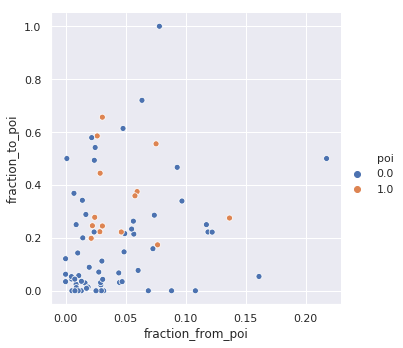

In [41]:
SeabornScatter('fraction_from_poi', 'fraction_to_poi')

This plot shows all POIs are located in a region above a certain amount. This echo's our basic intuition, if you don't frequently contact or work closely with a POI you probably aren't involved in activities that would make you one. This will be a useful metric for the algorithm to exclude people.

Our general intuition doesn't account for the possibility of some high-ranking member getting a low-level employee to do some shady business. If you are a POI you may want to pick someone you rarely interact with on purpose as a way to cover up your tracks. A conspiracy theory like that would be hard to detect in email but would hopefully surface in the financial data, say in the way of a large bonus?

Let's try and encode something like that into another feature. Instead of low email contact, we'll go with the simple idea that if you're in *frequent* contact with POIs and making large sums of money you may be in on the fraud. To do that we'll combine certain email and financial data together.

Now I need to break here for a moment and take you through an internal conversation I had with myself as I wrestled with a question on this concept. The outcome of this changed my perspective overall and how I understand these procedures to work. I could make this an appendix and clean up this section but it may be interesting to experience this in the same place it happened to me:

If this synthetic feature is made out of already-available data, am I really creating anything new that would be useful information? I spent a while chewing on this and then remembered the X and Y coordinate example where the hypotenuse of each pair was calculated as a synthetic feature and that was used to differentiate data radially. While the original data was used, the synthetic feature exposed a new property of the data that was leveraged by the algorithm. 

While chewing on this question I had an initial rejection to the idea of synthetic features being useful and I dug into that. That rejection came from the unconscious assumption that trying various combinations of features is redundant because that is what the algorithm is already doing on its own: given features it tries various mathematical operations across features (or subsets of them) and evaluates the results. As I started uncovering this underlying assumption  I wasn't sure where this idea came from. Thinking on it, my best guess is it formed before I actually learned anything about ML, born from the "throw everything at it, it will solve it" misconception. I didn't realize this thought was even running in the background! If this is not how ML works it means that there are many, many different combinations I could create as additional features for the algorithms to work with (begs the question, how to make useful ones instead of making noise?) **and** if the algorithms are not doing various combinations and assessing .. what *are* they doing with all those features and dimensions? This forces me to recapitulate what I was taught with a new perspective and fill in the uprooted areas of my previous understanding.

(Thought process may have also been tainted by all the scatter-plots I was looking at and assumed this is what was going on with the computer flipping through dimensions trying to find correlation? Not entirely sure but a lot of plotting was happening when this epiphany happened)

I'll address the first part of that new understanding here, creating new features in this section and I'll save the next section for discussing what the algorithms are doing and how they are generating answers.

Interesting the parallels between thinking and coding, a subconscious assumption running in the background blocking understanding and an inconspicuous error in code producing faulty outcomes. A rhyme of ideas :)

Okay back to the matter at hand. 

With creating synthetic features I can hopefully expose new facets of the data for the algorithms to leverage. Let's try to make a feature that combines the two domains with the simple idea that if you're in frequent contact with POIs and making relatively large sums of 'reward' money, you may be in on the fraud. From the financial data I'm going to use bonus. This seems like a category where someone could be rewarded and the reason doesn't have to be explained in great detail, shrouding illegitimate activity. I want to measure the bonus in relation to the salary so the exact salaries between people aren't compared.

As for connectivity, I'm going to pick the fraction of shared receipt (cc'd) with a POI. The idea is that you may not have direct communication with a POI but still be connected by association. The second reason is this feature captures a broader range of people than those who have emails directly to- or from- POIs. I take this approach because I'm hesitant to believe the direct-POI values are accurate. For example, there's an entry with 100% fraction_to_poi which comes from only 17 emails, you think someone only wrote 17 emails? ..well, it was 2001 (I should be wary of this, if it's not a legitimate number it's affecting all the rescaling). By picking shared_receipt I'm being less restrictive with who is selected, hopefully making up for anyone with incomplete data.

I'll need to pick which operand to use to combine these features. I wouldn't want to use addition since fraction_shared is on a scale of 0 to 1 and the bonus ratios are much larger. I'll multiply the values together, this means the bonus ratio will be scaled relative to the amount of shared communication that individual has. We'll call this feature "suspicious_cash". 

I was thinking of doing a similar thing with stock value as well. If you were offered large stock options that may be another way to reward suspicious activity.  I'll add exercised_stock with restricted_stock as this gives the full "potential" of stock options. I'll use salary again as the baseline to get a ratio and then scale the ratio by the shared_receipt fraction. I'll call it "suspicious_stock". I'll save the ratios of bonus-to-salary and exercised-to-restricted as well.

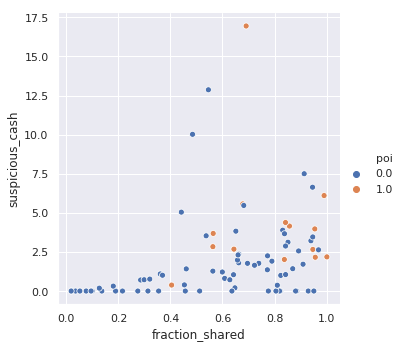

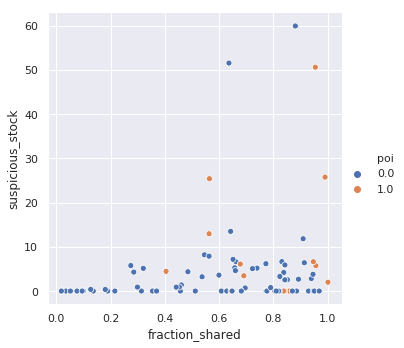

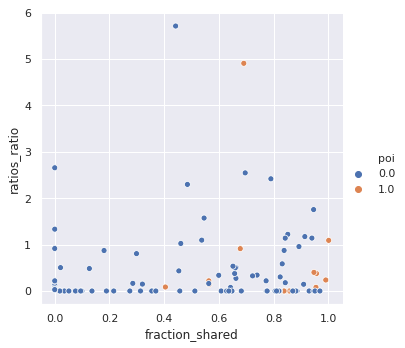

In [42]:
for key in data_dict:
    salary = data_dict[key]['salary']
    bonus = data_dict[key]['bonus']
    exercised_stock_options = data_dict[key]['exercised_stock_options']
    restricted_stock = data_dict[key]['restricted_stock']
    fraction_shared = data_dict[key]['fraction_shared']
    
    # Calculating the suspicious cash
    if salary == 'NaN' or bonus == 'NaN':
        bonus_ratio = 0.0
        suspicious_cash = 0.0
    else:
        bonus_ratio = bonus / float(salary)
        suspicious_cash = bonus_ratio * fraction_shared
        
    # Calculating the suspicious stock along with the other values required
    if salary == 'NaN' or exercised_stock_options == 'NaN' or restricted_stock == 'NaN':
        stock_potential_ratio = 0.0
        suspicious_stock = 0.0
        exercised_stock_options = 0.0
        restricted_stock = 0.0
        salary = 0.0
    else:
        stock_potential = exercised_stock_options + restricted_stock
        stock_potential_ratio = stock_potential / salary
        suspicious_stock = stock_potential_ratio * fraction_shared
            
    # and why not ... 
    if bonus_ratio == 0. or stock_potential_ratio == 0.: 
        ratios_ratio = 0.0
    else:
        ratios_ratio = bonus_ratio / float(stock_potential_ratio)

    #Writing the features to the dictionary
    data_dict[key]['bonus_ratio'] = bonus_ratio
    data_dict[key]['suspicious_cash'] = suspicious_cash
    data_dict[key]['stock_potential_ratio'] = stock_potential_ratio
    data_dict[key]['suspicious_stock'] = suspicious_stock
    data_dict[key]['ratios_ratio'] = ratios_ratio
    
SeabornScatter('fraction_shared', 'suspicious_cash')
SeabornScatter('fraction_shared', 'suspicious_stock')
SeabornScatter('fraction_shared', 'ratios_ratio')

new_features = new_features + ['bonus_ratio', 'suspicious_cash', 'stock_potential_ratio', 'suspicious_stock', 'ratios_ratio']

If you make a ridiculous salary and equally ridiculous bonus, the ratio will report a value that's not suspicious. I'd imagine that those with the top-tier salaries or stock values are already on the suspicious list, what I'm trying to find is if there any highly skewed bonuses or stock values and it looks like there are but only one of them is a POI. 

A lot of the higher-ups used, and liquidated, all their stock options before the fall of the company. If someone was privy to the insider information they may done the same. We'll see if we can find a signal of this by looking at how little of the restricted stock was deferred in conjunction with shared_receipt. This approach will have to be different since the value we're looking for in restricted_stock_deferred is 0. I'll call this feature 'internal_meltdown'. 

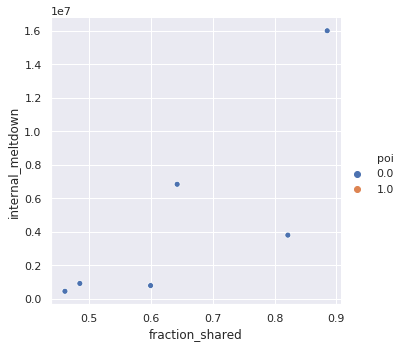

In [43]:
for key in data_dict:
    exercised_stock_options = float(data_dict[key]['exercised_stock_options'])
    restricted_stock_deferred = float(data_dict[key]['restricted_stock_deferred'])
    fraction_shared = float(data_dict[key]['fraction_shared'])
    if restricted_stock_deferred == 'NaN':
        internal_meltdown = 0.0    
    else:
        liquidated_diff = exercised_stock_options - restricted_stock_deferred
        internal_meltdown = liquidated_diff * fraction_shared

    data_dict[key]['internal_meltdown'] = internal_meltdown

SeabornScatter('fraction_shared','internal_meltdown')
#new_features = new_features + ['internal_meltdown']

I like the idea of this feature but it's not practical with so few data points so I won't add it to the feature list. On top the few data points, none of the POIs are shown. Looking at the PDF I see that most of the POIs do not have a value for their restricted_stock_deferred column; this makes sense since we thought they may be using all their options. Unfortunately I cannot tell if that data is missing or they didn't have anything left to defer. It would have been more useful for the PDF to state a "0" than a null where applicable.

Final comments on this section:

1.) After reviewing this section, feature creation reminds me of cross-correlation. I create different features (underlying distributions/populations) to try and approximate the 'real' distribution of what a POI is?

2.) I don't know if the '-' in the PDF means missing information or 0. It would have been better for the PDF to make a distinction. For example, Sanjay has nothing in payments except expenses, but has a substantial stock portfolio. Did he not receive a salary or is that missing data? Or was this some sort of international payment structure? Another example, Jeff Skilling has a '-' for his restricted_stock_deferred, does that mean he didn't have any deferred stock or the value was 0? This question makes me second-guess my culling procedure in the feature selection section and what should be used for making new features.

3.) Is bonus the sum of all bonuses or a bonus for a particular year? That would be another avenue to explore if we had the data but for now we'll have to go with what we have.

4.) Is there a way we can measure how useful our features are? One way to check is with the sklearn.feature_selection class (from which I'll use SelectKBest). This method ranks the features based on how they perform in a given statistical test that you choose. You can look at their webpage for more info. I may go back and do this at some point.

5.) What's surprising to me is some of the outliers in the plots aren't POIs. This shows that whoever was marking POIs had additional information to make decisions which we don't have access to or worse, the investigation completely missed people. If more information was available, I'd guess that was a different population of knowledge upon which POIs were selected and we may not be able to replicate that decision process here with less information.

6.) Given that, it seems more logical to me to develop an algorithm that prioritizes recall over precision. Recall is the ability to correctly identify or find (recall) the true POIs. Precision looks at a different ratio and that is, out of those labeled as POI from algorithm how many are true POIs. Precision is like a confidence measure that what is selected as a POI is a POI. Having high recall and lower precision means you cast a larger net, you are more 'suspicious', that is, you can identify all the POIs and the edge cases will be labeled POI as well. For the other way around, to have high precision and low recall, is to take a more conservative approach so when you identify a POI you are highly confident it is one and edge cases would not be classified as POI. These approaches each have their use cases. For an investigation like where a POI label means more investigation, I wouldn't want anyone to slip through the cracks. If this label meant you were automatically sentenced to 10 years in prison, I would be more conservative.

# Try Multiple Classifiers

Identifying persons of interest within the Enron dataset is a supervised classification problem. We have known POIs upon which to train an algorithm to make predictions on new observations. For this type of problem we have a few algorithms to choose from: Naive Bayes, Support Vector Machines, Decision Trees, Regressions, AdaBoost, and Random Forests.. just to name a few. We'll explore a few of these and then select which one we'd like to use for the final assessment. 

First I'll put together all the features we have at this point and split them into training and testing sets.

In [44]:
feature_list = financial_features + new_features
feature_list

['salary',
 'deferral_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'expenses',
 'other',
 'deferred_income',
 'long_term_incentive',
 'fraction_from_poi',
 'fraction_to_poi',
 'fraction_shared',
 'bonus_ratio',
 'suspicious_cash',
 'stock_potential_ratio',
 'suspicious_stock',
 'ratios_ratio']

Let's load the data with those features and split them into training and testing sets. To do that I'll import some helper functions and write a small function to produce the lists that we need for the sklearn functions. This can be used with all the algorithms.

In [59]:
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def ExtractAndSplit(features_list, data_dict, random_state, scale_data=True):
    # POI is needed at the beginning of the list, this is where the labels are stored
    features_list = ['poi'] + features_list
    # featureFormat changes NaNs to 0's (and other things)
    data_array = featureFormat(data_dict, features_list)
    # Scaling the values to the range 0-1
    if scale_data == True:
        data_array = MinMaxScaler(copy=True, feature_range=(0, 1)).fit(data_array).transform(data_array)
    # Spliting the data into labels and feature lists
    labels, feature_values = targetFeatureSplit(data_array)
    # Separating the lists into training and testing sets to work with
    features_train, features_test, labels_train, labels_test = train_test_split(
        feature_values, labels, test_size=0.3, random_state=random_state)

    return features_train, features_test, labels_train, labels_test

random_state = 42
features_train, features_test, labels_train, labels_test = ExtractAndSplit(feature_list, data_dict, random_state, scale_data=False)
# Checking the feature scaling
print 'Shape: ', pd.DataFrame(features_train).shape
print 'Sample: ',pd.DataFrame(features_train).tail()


Shape:  (99, 17)
Sample:            0          1          2          3         4         5        6   \
94  263413.0        0.0   506765.0   900000.0  441096.0  228763.0  51587.0   
95  201955.0  2869717.0  1729541.0  4175000.0  126027.0   13868.0    152.0   
96       0.0   504610.0  2218275.0        0.0       0.0       0.0      0.0   
97       0.0        0.0        0.0        0.0       0.0   27942.0      0.0   
98       0.0        0.0  1324578.0        0.0  560170.0       0.0      0.0   

           7         8         9         10        11         12         13  \
94  -125000.0       0.0  0.029817  0.000000  0.842317   3.416688   2.877933   
95 -3081055.0  304805.0  0.016196  0.029613  0.484838  20.672922  10.023019   
96        0.0  461912.0  0.000000  0.000000  0.136095   0.000000   0.000000   
97  -101250.0       0.0  0.000000  0.000000  0.000000   0.000000   0.000000   
98        0.0       0.0  0.000000  0.000000  0.019342   0.000000   0.000000   

     14        15        16  


## Naive Bayes

Now that we have our training and testing sets we can experiment with various algorithms. Let's try the simplest first, a Naive Bayes classifier.

Naive Bayes is a simple probabilistic classifier based on applying Bayes Theorem; it makes a classification based on which label has the highest probability. The (posterior) probability is calculated by multiplying the overall probability of the label by the probability of the label in that given feature. If there are multiple features, the posterior probability for each feature is calculated and then all of them are summed. Whichever label at the end has the highest probability is selected as the classification. The naive part here is from the assumption that each feature (and the overall label distribution) is independent of every other feature.

Based on this description, it sounds to me that the Naive Bayes would always classify points as non-POI because the probability of a POI is so low (~18 of 150)? Let's try out a simple Naive Bayes classifier and see how it does.

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf = GaussianNB().fit(features_train, labels_train)
predictions = clf.predict(features_test)
accuracy = accuracy_score(labels_test, predictions)
print accuracy

0.9302325581395349


93% right out of the gate looks pretty good!

..but.. 

As eluded to earlier, the number of POIs compared to non-POIs is skewed. There aren't many data points for POIs and in the Naive Bayes classifier it could blindly label all people as non-POI and report high accuracy scores. Essentially, because there is so few POIs it would get a relatively small amount wrong, making it seem like it performed well.

The accuracy metric here is a very crude score. It is the ratio of predictions labeled correctly compared to all predictions. There are more useful metrics we can use called "Recall" and "Precision" (from a confusion matrix). Recall is how many of the true positives were found, i.e. how many of the 18 known POIs were found. Precision is how many of the people labeled as POIs really were true positive i.e. if the algorithm labels 12 people POIs, how many of that 12 were actual POIs.

As in the previous case, if the Naive Bayes blindly labeled everyone a POI the recall would 100% but the precision value would be very low. These metrics give better insight into how the algorithm is performing. 

Let's see how Naive-Bayes does with precision and recall:

In [61]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

recall = recall_score(labels_test, predictions)
precision = precision_score(labels_test, predictions)
f1 = f1_score(labels_test, predictions)

print 'Recall    [tp / (tp + fn)]: %.2f' % recall
print 'Precision [tp / (tp + fp)]: %.2f' % precision
print 'F1 score: %.2f \n' % f1
print 'Confusion matrix: \n \
[TN FP] \n \
[FN TP] \n \n', confusion_matrix(labels_test, predictions)

Recall    [tp / (tp + fn)]: 0.60
Precision [tp / (tp + fp)]: 0.75
F1 score: 0.67 

Confusion matrix: 
 [TN FP] 
 [FN TP] 
 
[[37  1]
 [ 2  3]]


Ah, the performance doesn't look so good anymore. Naive Bayes was only able to identify 60% of the known POIs and of the POI labels it gave out, only 75% were correct. From the confusion matrix we can see that it missed 2 of the POIs (false negatives).

The F1 score is a [harmonic mean](https://towardsdatascience.com/on-average-youre-using-the-wrong-average-geometric-harmonic-means-in-data-analysis-2a703e21ea0) (because we're dealing with ratios) of precision and recall. An F1 score of 1 is 100% precision and recall. In general , for this project I'm okay with a precision score being lower as this means the algorithm is more generous with its POI labels.

## Nearest Neighbor

### K-Nearest Neighbor

Nearest neighbor is a simple algorithm where the distance of each point to the new point is calculated. The new point takes the same label as its closest neighbor. This can be modified to use a predefined number of training points (*k*), use a radius-based limit, or change the weights of each point. The optimal choice of neighbors is highly data-dependent: in general a larger number of neighbors suppresses the effects of noise, but makes the classification boundaries less distinct.

Why this may be useful in our case is because it is a non-parametric method (no predetermined distribution), it is often successful in classification situations where the decision boundary is very irregular. The neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not construct a general internal model, but simply stores instances of the training data. 

In [62]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=2, weights='uniform')
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)

recall = recall_score(labels_test, predictions)
precision = precision_score(labels_test, predictions)
f1 = f1_score(labels_test, predictions)

print 'Recall    [tp / (tp + fn)]: %.2f' % recall
print 'Precision [tp / (tp + fp)]: %.2f' % precision
print 'F1 score: %.2f \n' % f1
print 'Confusion matrix: \n \
[TN FP] \n \
[FN TP] \n \n', confusion_matrix(labels_test, predictions)

Recall    [tp / (tp + fn)]: 0.40
Precision [tp / (tp + fp)]: 1.00
F1 score: 0.57 

Confusion matrix: 
 [TN FP] 
 [FN TP] 
 
[[38  0]
 [ 3  2]]


We've beaten Naive Bayes in precision and F1 score but while this looks promising, the confusion matrix shows it only labeled 2 of the 5 POIs correctly. 

In cases where the data is not uniformly sampled - like ours - a radius-based neighbors classification may be a better choice. Instead of specifying a number of neighbors I will specify a fixed radius. For our case the benefit of this is that points in sparser neighborhoods use fewer nearest neighbors for the classification (say those people in the upper echelons of pay). 

### Radius-Neighbor

The radius is in the units of the parameter space. I may need to normalize all the values in the features for this, otherwise I have features on a scale of 0 to 1 and other features in the millions. The outlier_label is a parameter that allows me to assign the label if there is no neighbor within the given radius (0 is non-POI, 1 is POI).

In [63]:
from sklearn.neighbors import RadiusNeighborsClassifier

features_train, features_test, labels_train, labels_test = ExtractAndSplit(feature_list, data_dict, random_state, scale_data=True)
#print(pd.DataFrame(features_train).tail())

# If I want to maximize Precision
clf = RadiusNeighborsClassifier(radius=0.75, outlier_label=1)
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)

recall = recall_score(labels_test, predictions)
precision = precision_score(labels_test, predictions)
f1 = f1_score(labels_test, predictions)

print 'Maximizing Precision with a radius of 0.75'
print 'Recall    [tp / (tp + fn)]: %.2f' % recall
print 'Precision [tp / (tp + fp)]: %.2f' % precision
print 'F1 score: %.2f \n' % f1
print 'Confusion matrix: \n \
[TN FP] \n \
[FN TP] \n \n', confusion_matrix(labels_test, predictions)

# If I want to maximize Recall
clf = RadiusNeighborsClassifier(radius=0.3, outlier_label=1)
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)

recall = recall_score(labels_test, predictions)
precision = precision_score(labels_test, predictions)
f1 = f1_score(labels_test, predictions)

print '\nMaximizing Recall with a radius of 0.3'
print 'Recall    [tp / (tp + fn)]: %.2f' % recall
print 'Precision [tp / (tp + fp)]: %.2f' % precision
print 'F1 score: %.2f \n' % f1
print 'Confusion matrix: \n \
[TN FP] \n \
[FN TP] \n \n', confusion_matrix(labels_test, predictions)

Maximizing Precision with a radius of 0.75
Recall    [tp / (tp + fn)]: 0.60
Precision [tp / (tp + fp)]: 1.00
F1 score: 0.75 

Confusion matrix: 
 [TN FP] 
 [FN TP] 
 
[[38  0]
 [ 2  3]]

Maximizing Recall with a radius of 0.3
Recall    [tp / (tp + fn)]: 1.00
Precision [tp / (tp + fp)]: 0.33
F1 score: 0.50 

Confusion matrix: 
 [TN FP] 
 [FN TP] 
 
[[28 10]
 [ 0  5]]


With the outlier_label set to make outlier points non-POIs (not run above), anything other than a radius of exactly 1 returns 0.00, this is because it doesn't find any True Positives. The reason it works at a radius of 1.0 is all the data is scaled from 0-1, so the radius includes everything. If I set the outlier_label to label any point without neighbors in the specified radius as a POI, *then* I start seeing some impressive results. 

The radius-limit does slightly better than nearest-neighbor with precision still at 100% and correctly identifying 1 more POI, raising recall to 60%. However if I tune the algorithm to use a smaller radius, I can shift the performance to maximize recall. It correctly detects all known POIs but suffers a lower F1 score from flagging ~2x as many people as suspicious. Based on our investigation I would take the lower F1 score as the algorithm is better suited to what we want. This may be where a discussion of how expensive personal investigations are and if better performance is required.

There are certain individuals who were deemed non-POIs as further investigation cleared their status, for example Lou Pai. He was cleared as a POI due to a divorce ~1 year before the collapse that forced him to sell all his shares and split assets with his ex-wife. This may give us insight into what constituted being a POI, is it insider-trading fraud? Or was it related to an individual participating in mark-to-market valuation of the books, writing down "expected" future profits as current earnings? Knowing more about what being a POI is could help shape our investigation, for example if it's focused on insider-trading that could affect our feature selection and synthetic features.  

### Thought Experiment

I'd be curious to look back at the names of the outliers we found early on and changed their status to POI. If we could retain 100% recall and a get higher precision this would signal to me that our basic intuition of certain individuals being POI is correct (exorbitant salaries, stocks, etc) and maybe reason we can't model this is because their status was changed to non-POI based on extraneous information we can't account for here?

In [68]:
alert_non_poi

['BHATNAGAR SANJAY',
 'FREVERT MARK A',
 'LAVORATO JOHN J',
 'MARTIN AMANDA K',
 'MCCLELLAN GEORGE',
 'PAI LOU L',
 'URQUHART JOHN A',
 'WHITE JR THOMAS E']

In [69]:
for name in alert_non_poi:
    data_dict[name]['poi'] = True
    
features_train, features_test, labels_train, labels_test = ExtractAndSplit(feature_list, data_dict, random_state, scale_data=True)
#print(pd.DataFrame(features_train).tail())

# If I want to maximize Recall
clf = RadiusNeighborsClassifier(radius=0.3, outlier_label=1)
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)

recall = recall_score(labels_test, predictions)
precision = precision_score(labels_test, predictions)
f1 = f1_score(labels_test, predictions)

print 'Maximizing Recall with the same radius as before:'
print 'Recall    [tp / (tp + fn)]: %.2f' % recall
print 'Precision [tp / (tp + fp)]: %.2f' % precision
print 'F1 score: %.2f \n' % f1
print 'Confusion matrix: \n \
[TN FP] \n \
[FN TP] \n \n', confusion_matrix(labels_test, predictions)

# Setting them back to the original labels to not mess anything up down-stream
for name in alert_non_poi:
    data_dict[name]['poi'] = False
 

Maximizing Recall with the same radius as before:
Recall    [tp / (tp + fn)]: 1.00
Precision [tp / (tp + fp)]: 0.40
F1 score: 0.57 

Confusion matrix: 
 [TN FP] 
 [FN TP] 
 
[[28  9]
 [ 0  6]]


This did exchange one FP to a TP that the classifier caught (woo!) but I don't know how many people we reclassified made it into the test set (still only 43 total). The way the data is currently split into training and test sets the same training/test set is made every time, this is so we can compare apples-to-apples between algorithms. I can set the random_state to another integer as a seed to generate a different training/test set and we can then compare again:

In [70]:
# Here I change the random_state seed number to generate a different training/test set
random_state = np.random.randint(1,100)
features_train, features_test, labels_train, labels_test = ExtractAndSplit(feature_list, data_dict, random_state, scale_data=True)

# Here is the test with the original labels maximizing recall
clf = RadiusNeighborsClassifier(radius=0.3, outlier_label=1)
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)

recall = recall_score(labels_test, predictions)
precision = precision_score(labels_test, predictions)
f1 = f1_score(labels_test, predictions)

print 'Original labels with a new training/test set:'
print 'Random seed: ', random_state
print 'Recall    [tp / (tp + fn)]: %.2f' % recall
print 'Precision [tp / (tp + fp)]: %.2f' % precision
print 'F1 score: %.2f \n' % f1
print 'Confusion matrix: \n \
[TN FP] \n \
[FN TP] \n \n', confusion_matrix(labels_test, predictions)

# And here is the test with the reclassified people
for name in alert_non_poi:
    data_dict[name]['poi'] = True
    
features_train, features_test, labels_train, labels_test = ExtractAndSplit(feature_list, data_dict, random_state, scale_data=True)
#print(pd.DataFrame(features_train).tail())

# If I want to maximize Recall
clf = RadiusNeighborsClassifier(radius=0.3, outlier_label=1)
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)

recall = recall_score(labels_test, predictions)
precision = precision_score(labels_test, predictions)
f1 = f1_score(labels_test, predictions)

print '\nReclassified people with the updated training/test set:'
print 'Random seed: ', random_state
print 'Recall    [tp / (tp + fn)]: %.2f' % recall
print 'Precision [tp / (tp + fp)]: %.2f' % precision
print 'F1 score: %.2f \n' % f1
print 'Confusion matrix: \n \
[TN FP] \n \
[FN TP] \n \n', confusion_matrix(labels_test, predictions)

# Setting them back to the original labels and random_state to not wreck anything down-stream
for name in alert_non_poi:
    data_dict[name]['poi'] = False
random_state = 42
 

Original labels with a new training/test set:
Random seed:  50
Recall    [tp / (tp + fn)]: 0.80
Precision [tp / (tp + fp)]: 0.25
F1 score: 0.38 

Confusion matrix: 
 [TN FP] 
 [FN TP] 
 
[[26 12]
 [ 1  4]]

Reclassified people with the updated training/test set:
Random seed:  50
Recall    [tp / (tp + fn)]: 0.83
Precision [tp / (tp + fp)]: 0.31
F1 score: 0.45 

Confusion matrix: 
 [TN FP] 
 [FN TP] 
 
[[26 11]
 [ 1  5]]


I've run this a few times with different random_states and the case where we reclassify the individuals who triggered sigma-alerts as POIs consistently beats the current dataset.

However, upon thinking on this further this may be misleading. Since these individuals are outliers it is unlikely they have neighbors and by default the algorithm is setup to mark outliers as POIs. In that case I haven't done anything more than re-identify the outliers. This may be an interesting test with algorithm that doesn't have this predetermined setting.

## SVM

The next algorithm to try is Support Vector Machines or SVMs. This is a generalized form of the Nearest-Neighbor algorithm. In Nearest-Neighbor when a new point is plotted the distance to *every* other point is calculated and the new point takes on the label of its nearest neighbor. SVMs are an adaptation of this approach in a few ways: 1.) calculate distance to only a few close points instead of all points 2.) assign weights to select points instead of all points. The amount of points used and their weights can be adjusted. The weighted sum of these "support" vectors determines which classification the new point is assigned. In a linear case, the points and weights are used to determine a boundary that maximizes the distance between classes. Something like this: 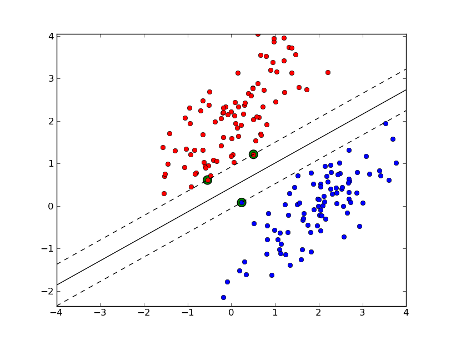

But what if our data isn't linearly separable? The real power behind SVMs is mapping the non-linear separable dataset into a higher dimensional space where we can find a hyperplane that can separate the samples. Or said another way, it's finding a function that transforms the non-linear data into linear data. This is referred to as the "Kernel trick". The kernel is what distorts the space to allow for finding the hyperplane. [This is the best introduction I've found.](https://www.youtube.com/watch?v=-Z4aojJ-pdg) SVM is has linear, Gaussian, polynomial, RBF, and custom kernels which can be used to distort the parameter space. 


Let's see how SVM works on our data. I'll use a kernel other than linear since our data doesn't seem linearly separable and I'll emphasize a boundary that correctly classifies all the known POIs (done through the C parameter which is a penalty for misclassifying) and a low gamma, where gamma defines the influence each point has (so not every point's influence has to be calculated). The trade off with gamma is that if you have less points the boundary is more highly trained to those specific points, having lots of points influence the boundary (high gamma) is a more generalized boundary.

In [90]:
from sklearn import svm

# Scaling affects SVM as support vectors are calculated off distance
features_train, features_test, labels_train, labels_test = ExtractAndSplit(feature_list, data_dict, random_state, scale_data=True)

clf = svm.SVC(C=10, kernel='poly', degree=3, gamma='scale')
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)

recall = recall_score(labels_test, predictions)
precision = precision_score(labels_test, predictions)
f1 = f1_score(labels_test, predictions)
print 'Random seed: ', random_state
print 'Recall    [tp / (tp + fn)]: %.2f' % recall
print 'Precision [tp / (tp + fp)]: %.2f' % precision
print 'F1 score: %.2f \n' % f1
print 'Confusion matrix: \n \
[TN FP] \n \
[FN TP] \n \n', confusion_matrix(labels_test, predictions)


Random seed:  42
Recall    [tp / (tp + fn)]: 0.60
Precision [tp / (tp + fp)]: 0.38
F1 score: 0.46 

Confusion matrix: 
 [TN FP] 
 [FN TP] 
 
[[33  5]
 [ 2  3]]


Where SVMs breakdown: 1.) don't perform well with noisy data since the discriminator location depends only on the few nearest data points 2.) choosing the right kernel is a trial and error process 3.) when datasets become very large they suffer from long processing times since the kernel is working with more points. 

While powerful, SVMs require a human in the loop that understands them well to make good judgment calls.

Based on some experimentation, the poor results indicate to me that we don't have very well separated data. While there are some points that are easily identifiable (and picked up by almost every classifier so far), the other POIs are more embedded in the non-POI classes. I also acknowledge this if my first time playing using SVM so I'm sure there is room for improvement.

## Decision Trees

The Decision Tree is an algorithm that implements successive linear separations. It splits the data along some axis that results in compartments with high purity. The parameters for this algorithm allow you to specify how many decisions you would like, how many samples need to be in a resulting compartment (leaf), and so on. A useful component of decision trees is you can plot the tree to inspect the decision and the results.

In [54]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=12, min_samples_split=2)
clf = clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)

recall = recall_score(labels_test, predictions)
precision = precision_score(labels_test, predictions)
f1 = f1_score(labels_test, predictions)

print 'Recall: %.2f' % recall
print 'Precision: %.2f' % precision
print 'F1 score: %.2f' % f1

Recall: 0.40
Precision: 0.18
F1 score: 0.25


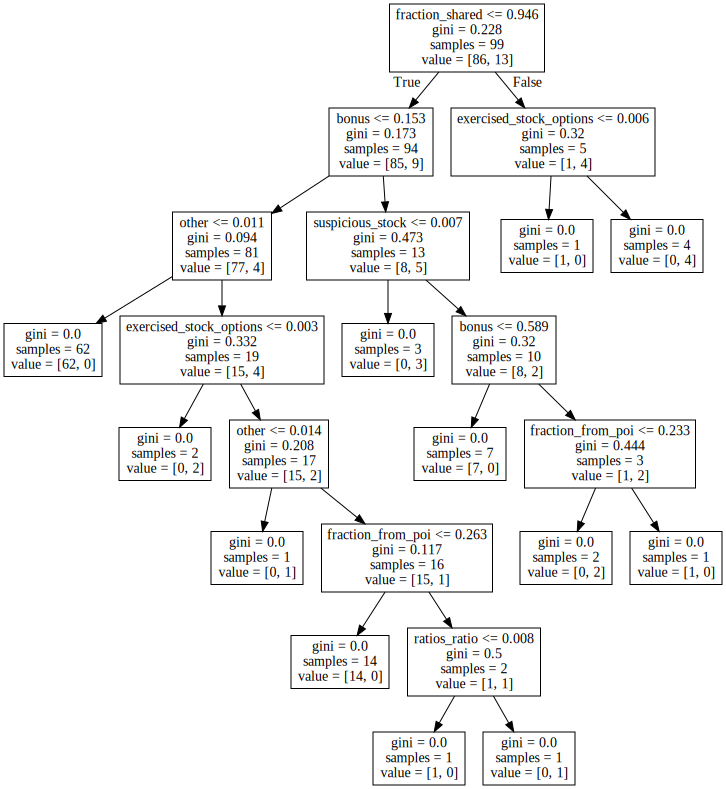

In [55]:
# To visualize the decision tree:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_list)
graph = graphviz.Source(dot_data) 
graph

## Random Forests

Final comments for this section:

1.) Should I be applying normalization to all the data?

# Tune Classifier

Remember to pack up in pickles and send to tester.py. There is also essay questions and a grading rubric.